## ImageDataGenerator

In [1]:
# Conceptos de hoy.

# Tamaño de entrada de imágenes tiene que ser consistente.

# Que las imágenes pueden ser propias, y tengo que preprocesarlas de alguna manera.

# Data augmentation

In [3]:
import numpy as np

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import PIL # Para ver la versión
from PIL import Image

import tensorflow as tf # Para ver la versión
import keras # Para ver la versión

# ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.models import Model

from keras.layers import Dropout, Flatten, Dense, Conv2D, Input
from keras.layers import GlobalAveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

import sklearn # Para ver la versión

from sklearn.metrics import confusion_matrix

In [4]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"Pillow=={PIL.__version__}")
print(f"tensorflow=={tf.__version__}")
print(f"keras=={keras.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

# Unidades de procesamiento
print("\nUnidades de procesamiento:")
for device in tf.config.list_physical_devices():
    print(f"\t- {device.name}")

numpy==1.26.4
matplotlib==3.4.2
Pillow==8.2.0
tensorflow==2.17.0
keras==3.5.0
scikit-learn==1.5.1

Unidades de procesamiento:
	- /physical_device:CPU:0


In [17]:
path = "../Data/imagenes/cats_and_dogs/"
training_data_dir = path + "train" 
validation_data_dir = path + "validation" 
test_data_dir = path + "test" 

print(training_data_dir)
print(validation_data_dir)
print(test_data_dir)

../Data/imagenes/cats_and_dogs/train
../Data/imagenes/cats_and_dogs/validation
../Data/imagenes/cats_and_dogs/test


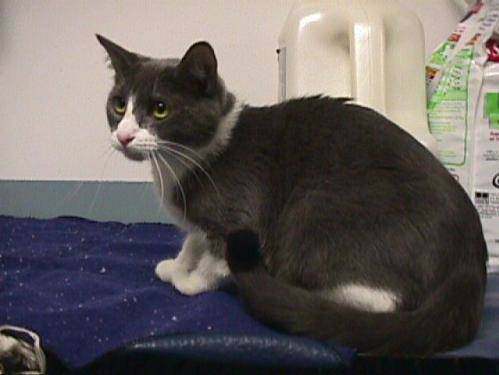

In [18]:
img = Image.open("../Data/imagenes/cats_and_dogs/train/cats/cat.4.jpg")
img

In [19]:
# Preprocesamos la imagen, para poder usar ImageDataGenerator la imagen debe de tener 4 dimensiones

img = np.asarray(img)
print(img.shape)

img = img / 255
print(img.shape)

h_dim = np.shape(img)[0]
w_dim = np.shape(img)[1]
num_channel = np.shape(img)[2]

img = img.reshape(1, h_dim, w_dim, num_channel)
print(img.shape)

(375, 499, 3)
(375, 499, 3)
(1, 375, 499, 3)


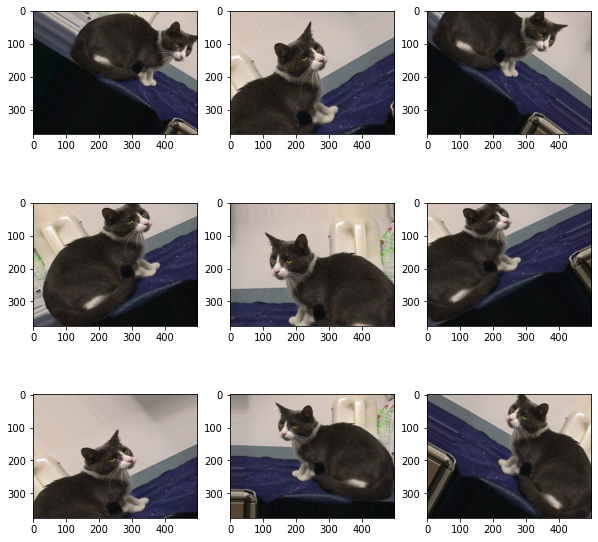

In [20]:
# ImageDataGenerator nos genera imagenes del gato editado 9 veces de diferente forma

batch_size = 9

# Inicializamos ImageDataGenerator
data_gen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')
# Entrenamos
data_gen.fit(img)

plt.figure(figsize = (10, 10)) 

for x, img_batch in enumerate(data_gen.flow(img, batch_size = 9)):
    for img in img_batch:
        plt.subplot(330 + 1 + x)
        plt.imshow(img)
        x += 1    
    if x >= batch_size:
        break
        
plt.show()

#### Vamos a hacer esto con todas las imagenes del fichero.

In [21]:
# Inicializamos los ImageDataGenerator

training_data_generator = ImageDataGenerator(rescale = 1./255,
                                             zoom_range = 0.2,
                                             horizontal_flip = True,
                                             vertical_flip = True)

validation_data_generator = ImageDataGenerator(rescale = 1./255)

test_data_generator = ImageDataGenerator(rescale = 1./255)

In [23]:
# Entrenamos los ImageDataGenerator

# Para poder usar .flow_from_directory(), necesitamos tener las carpetas ordenadas, es decir:

# una carpeta de train con una carpeta de imagenes para cada clase
# una carpeta de validation con una carpeta de imagenes para cada clase
# y una carpeta de test con una carpeta de imagenes para cada clase

size = 200

training_generator = training_data_generator.flow_from_directory(training_data_dir,
                                                                 target_size = (size, size),
                                                                 batch_size = 32,
                                                                 class_mode = "binary")

validation_generator = validation_data_generator.flow_from_directory(validation_data_dir,
                                                                     target_size = (size, size),
                                                                     batch_size = 1,
                                                                     class_mode = "binary")

test_generator = test_data_generator.flow_from_directory(test_data_dir,
                                                         target_size = (size, size),
                                                         batch_size = 1,
                                                         class_mode = "binary")

# En caso de que la clasificación sea multi-clase, el cambiamos el parámetro class_mode = "categorical"

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
model = Sequential()

model.add(Input(shape = (size, size, 3)))

model.add(Conv2D(filters = 16, kernel_size = 9, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 16, kernel_size = 9, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())

model.add(Dense(units = 120, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 16)   │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 16)   │        20,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     4,800,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,824,897 (18.41 MB)

 Trainable params: 4,824,897 (18.41 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss      = "binary_crossentropy",
              optimizer = "adam",
              metrics   = ["accuracy"])

In [ ]:
history = model.fit(training_generator,
                    epochs = 10,
                    validation_data = validation_generator)

In [ ]:
def plot_history(history):
    
    accuracy     = history.history["accuracy"]
    loss         = history.history["loss"]

    val_accuracy = history.history["val_accuracy"]
    val_loss     = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    # Plot Accuracy
    plt.plot(epochs,     accuracy, "r--", label = "Train accuracy")
    plt.plot(epochs, val_accuracy,  "b", label = "Validation accuracy")
    
    plt.title("Training and validation accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.show()

    # Plot Loss
    plt.plot(epochs, loss, "r--", label = "Train loss" )
    plt.plot(epochs, val_loss ,  "b", label = "Validation loss" )
    
    plt.title("Training and validation loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()

In [ ]:
plot_history(history)

test_loss, test_accuracy = model.evaluate(test_generator, verbose = 2)
print ("Test Accuracy:", test_accuracy)

In [ ]:
y_hat = model.predict(test_generator)

y_hat

In [ ]:
y_test = test_generator.labels

y_test

In [ ]:
thresh = 0.5

y_hat = [0 if pred < thresh else 1 for pred in y_hat]

y_hat

In [ ]:
confusion_matrix(y_test, y_hat)

In [ ]:
# Testing
probabilities = model.predict(test_generator, 10)

for index, probability in enumerate(probabilities):
    
    image_path = test_data_dir + "/" + test_generator.filenames[index]
    img = plt.imread(image_path)
    plt.imshow(img)
    
    if probability > 0.5:
        plt.title(f"Proba: {1 - probability[0] : ,.3f} dog")
        
    else:
        plt.title(f"Proba: {1 - probability[0] : ,.3f} cat")
    plt.show()


In [ ]:
model.save_weights("red_neuronal_entrenada_cats_dogs.h5")

In [ ]:
################################################################################################################################